In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
file_path = 'data/bsmax_0_1.csv'
data = pd.read_csv(file_path, sep='\t')

# Split the data into 80% for training and 20% for prediction
split_index = int(len(data) * 0.8)
train_data = data[:split_index]
predict_data = data[split_index:]

# Separate features and target variable for training data
X_train = train_data.drop('rtn', axis=1).drop('ymd', axis=1)
y_train = train_data['rtn']

# Normalize the features for training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Separate features and target variable for prediction data
X_predict = predict_data.drop('rtn', axis=1).drop('ymd', axis=1)
y_actual = predict_data['rtn']

# Normalize the features for prediction data
X_predict_scaled = scaler.transform(X_predict)

# Predict on the prediction set
y_pred = model.predict(X_predict_scaled)

# Evaluate the model on the prediction set
r2 = r2_score(y_actual, y_pred)
print(f'R-squared value on prediction data: {r2}')


R-squared value on prediction data: 0.8084930194429341


# 견해
처음 코드를 만들었을때 날자 데이터까지 선형 회귀에 걸리면서 돌아갔다.<br>
R-squared value on prediction data: 0.7999694122666615<br>
이 정도 결과를 이끌어 냈고<br><br>
ymd 까지 지우고난 후<br>
R-squared value on prediction data: 0.8084930194429341<br>
0.01 % 끌어 올렸다<br><br>
이로 유의미 하지 않은 데이터는 선형회귀 입장에서도 거르는 느낌을 받았다.<br>


# R-squared (R²)
R-squared (R²) value는 통계 및 회귀 분석에서 자주 사용되는 지표로, 회귀 모델이 관측된 데이터를 얼마나 잘 설명하는지를 나타냅니다. R² 값은 0과 1 사이의 값을 가지며, 1에 가까울수록 모델이 데이터를 잘 설명하고 있다는 의미입니다.

R² 값을 계산하는 공식은 다음과 같습니다:

\[ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} \]

여기서:
- \( SS_{res} \)은 잔차 제곱합 (Sum of Squares of Residuals) 입니다.
- \( SS_{tot} \)은 총 제곱합 (Total Sum of Squares) 입니다.

각각의 항목은 다음과 같이 정의됩니다:
- 잔차 제곱합 (\( SS_{res} \))은 실제 값과 예측 값의 차이의 제곱의 합입니다.
- 총 제곱합 (\( SS_{tot} \))은 실제 값과 평균 값의 차이의 제곱의 합입니다.

R² 값이 높을수록 모델이 실제 데이터를 잘 설명한다는 것을 의미하지만, 이 값이 항상 높은 것이 좋은 모델을 의미하는 것은 아닙니다. 과적합(overfitting)의 경우에도 R² 값이 높아질 수 있으므로, 모델 평가 시 다른 지표들도 함께 고려하는 것이 중요합니다.

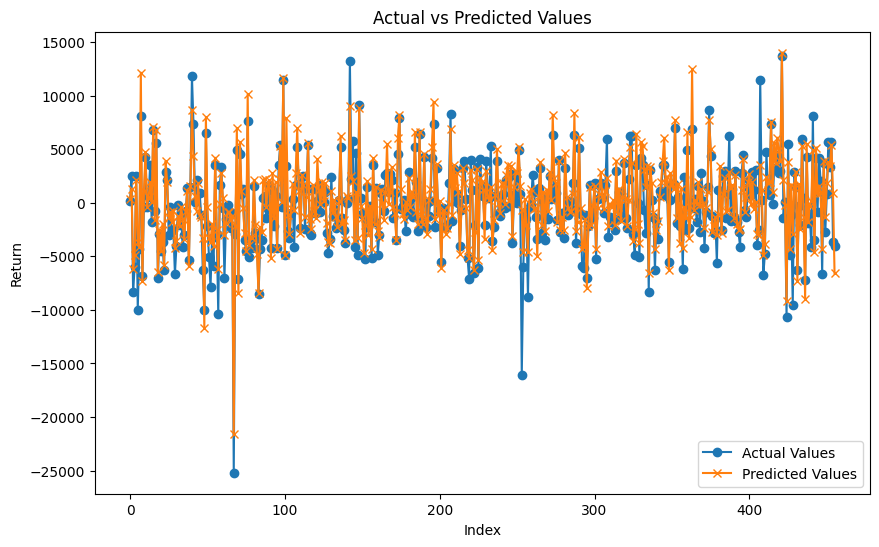

In [33]:
# Visual comparison
plt.figure(figsize=(10, 6))
plt.plot(y_actual.values, label='Actual Values', marker='o')
plt.plot(y_pred, label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Return')
plt.legend()
plt.show()

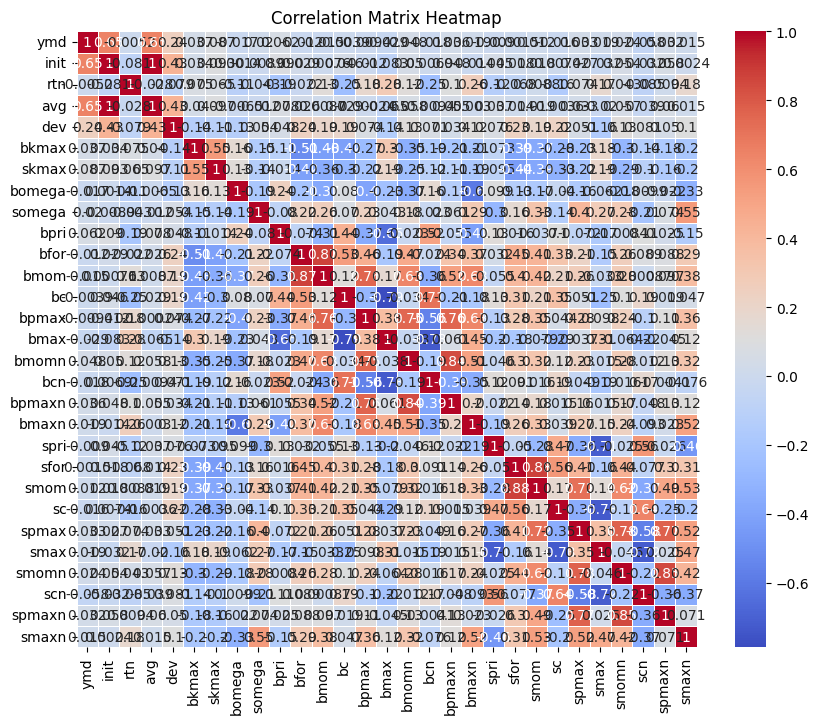

In [34]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data.corr()


# Plot the correlation matrix as a heatmapx
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [38]:
import numpy as np
count = 0 
for i in range(len(y_actual.values)):
    if(np.sign(y_actual.values[i]) != np.sign(y_pred[i])):
        count += 1
print(len(data), len(train_data), count, len(y_actual.values))
print(f"{(count/len(y_actual.values) * 100)} %")
    # print(f'Actual: {y_actual.values[i]}, Predicted: {y_pred[i]}')

2276 1820 58 456
12.719298245614036 %


# 생각 정리
결론적으로 rtn 이라는게 오르고 낮아지는 이분법인 true false 라면<br>
서로 부호가 다른 것을 추렸을때 <br>

|데이터|총|학습|예측|예측 중 부호가 다른 것|
|---|---|---|---|---|
|개|2276|1820|456| 58|






In [40]:
# Extract the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_


# Create the linear regression formula
formula = f"{intercept}"
for i, feature in enumerate(X_train):
    formula += f" + ({coefficients[i]} * {feature})"

print("Linear Regression Formula:")
print(f"rtn = {formula}")



Linear Regression Formula:
rtn = 86.04065934064829 + (-59166.13195033177 * init) + (58995.614621462366 * avg) + (13.09626008931368 * dev) + (-94.8131077263656 * bkmax) + (89.60728916014038 * skmax) + (143.9473531355098 * bomega) + (44.197475057555785 * somega) + (-61.54706527840213 * bpri) + (-17.260286784897268 * bfor) + (89.20474763300025 * bmom) + (98.50802376177788 * bc) + (-189.0482113588348 * bpmax) + (21.282320316637993 * bmax) + (199.3826612032745 * bmomn) + (-88.60968121078683 * bcn) + (-13.198173905633308 * bpmaxn) + (47.2624571260364 * bmaxn) + (-7.249238968442165 * spri) + (183.71856817370283 * sfor) + (-173.95438542899217 * smom) + (-208.95623087512826 * sc) + (168.1471882401933 * spmax) + (-217.9259848113335 * smax) + (77.83597091357649 * smomn) + (-35.209588751959416 * scn) + (-289.01532293965937 * spmaxn) + (-83.30738300192701 * smaxn)


# 해석 공식 추출

계수(coefficient)와 절편(intercept)<br>

여기서 rtn은 종속 변수(예측하고자 하는 값)이고, intercept와 coefficient는 회귀 모델로부터 추출된 값이며, feature는 독립 변수(입력 변수)입니다.

다른 종목에서 비슷하게 나오나 확인 해봐야 함 